In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_glass.csv')

In [3]:
numeric = df.select_dtypes(include=np.number).columns.to_list()
numeric.remove('index')
numeric.remove('Type')

x = df[numeric]
y = df['Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [4]:
# # Pipeline ordinal variables
# ordinal_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OrdinalEncoder())
# ])

# # Pipeline nominal variables
# nominal_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder(sparse=True, handle_unknown='ignore'))
# ])

# Pipeline numeric variables
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('encoder', StandardScaler())
])

preprocessing_pipeline = ColumnTransformer([
    #('nominal_preprocessor', nominal_pipeline, nominal),
    #('ordinal_preprocessor', ordinal_pipeline, ordinal),
    ('numeric_preprocessor', numeric_pipeline, numeric)
])


In [5]:
# Create model
model_dtree = DecisionTreeClassifier()
model_svc = SVC()
model_sgdc = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
model_knn = KNeighborsClassifier(n_neighbors=3)

complete_pipeline_dtree = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('estimator', model_dtree)
])

complete_pipeline_svc = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('estimator', model_svc)
])

complete_pipeline_sgdc = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('estimator', model_sgdc)
])

complete_pipeline_knn = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('estimator', model_knn)
])

<h4 align="center">Arbol de decision 🕵️​ </h4>

In [6]:
complete_pipeline_dtree.fit(x_train, y_train)
y_pred_dtree = complete_pipeline_dtree.predict(x_test)
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       1.00      0.43      0.60        14
           3       0.50      1.00      0.67         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.79        43
   macro avg       0.84      0.89      0.83        43
weighted avg       0.86      0.79      0.78        43



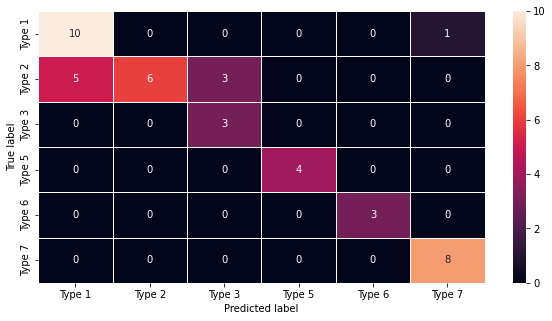

In [7]:
cm = confusion_matrix(y_test, y_pred_dtree)
cm_df = pd.DataFrame(cm,
                    index=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'],
                    columns=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'])

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [8]:
complete_pipeline_svc.fit(x_train, y_train)
y_pred_svc= complete_pipeline_svc.predict(x_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.67      0.71      0.69        14
           3       0.00      0.00      0.00         3
           5       0.67      0.50      0.57         4
           6       0.50      0.33      0.40         3
           7       1.00      0.88      0.93         8

    accuracy                           0.72        43
   macro avg       0.59      0.57      0.57        43
weighted avg       0.68      0.72      0.69        43



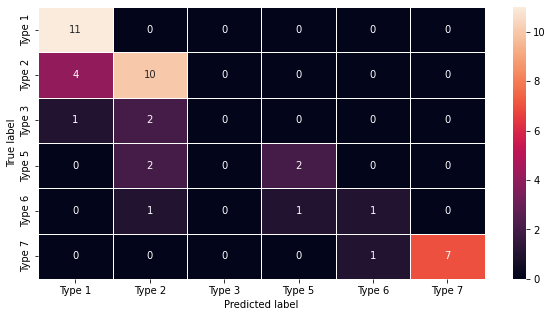

In [9]:
cm = confusion_matrix(y_test, y_pred_svc)
cm_df = pd.DataFrame(cm,
                    index=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'],
                    columns=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'])

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [10]:
complete_pipeline_sgdc.fit(x_train, y_train)
y_pred_sgdc= complete_pipeline_sgdc.predict(x_test)
print(classification_report(y_test, y_pred_sgdc))

              precision    recall  f1-score   support

           1       0.75      0.82      0.78        11
           2       0.75      0.64      0.69        14
           3       0.25      0.33      0.29         3
           5       0.50      0.50      0.50         4
           6       1.00      0.67      0.80         3
           7       0.89      1.00      0.94         8

    accuracy                           0.72        43
   macro avg       0.69      0.66      0.67        43
weighted avg       0.74      0.72      0.72        43



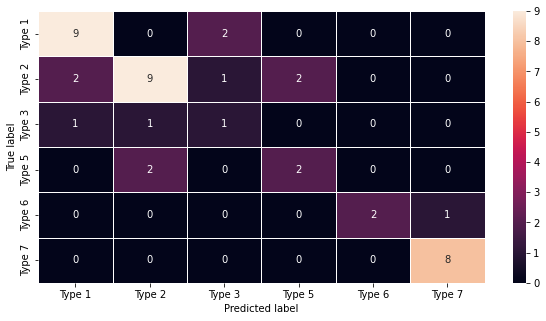

In [11]:
cm = confusion_matrix(y_test, y_pred_sgdc)
cm_df = pd.DataFrame(cm,
                    index=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'],
                    columns=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'])

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
complete_pipeline_knn.fit(x_train, y_train)
y_pred_knn = complete_pipeline_knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.79      0.79      0.79        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.81        43
   macro avg       0.74      0.74      0.74        43
weighted avg       0.78      0.81      0.79        43



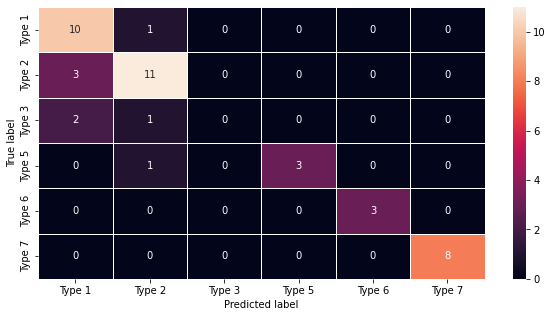

In [13]:
cm = confusion_matrix(y_test, y_pred_knn)
cm_df = pd.DataFrame(cm,
                    index=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'],
                    columns=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'])

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

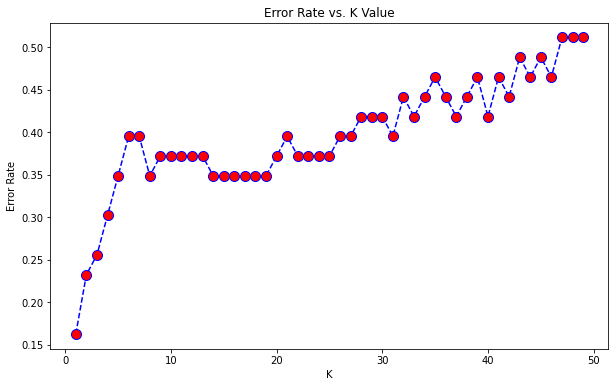

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')